# 1. **Importing libraries and datasets**

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# ploting
import seaborn as sns # advened ploting
from scipy.stats import randint #for some metrics, it works better the the numpt function
import mlxtend.plotting # will help us plot 

# import learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#preprosecors
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing evaluation models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ufi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/vfl.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/sohu.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/rdcm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/virt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/hylb.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/skt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/asix.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/mac.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/gut.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ngs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/vpg.us.txt
/kaggle/input/pr

plotting function

In [15]:
def plot_labeled_decision_regions(X_test, y_test, clfs):
    
    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)
        
        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

**load_data and first impresion** 

In [16]:
# load the data and assign: train, test
df_train = pd.read_csv("../input/mobile-price-classification/train.csv")
df_test = pd.read_csv('../input/mobile-price-classification/test.csv')

# Primery inspection on the data
print(df_train.shape)
print(df_test.shape)
print(df_train.head())
print(df_test.head())
print(df_train.info())
print(df_test.info())
df_train.describe()

(2000, 21)
(1000, 21)
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**after viewing the data we notice an irelevant column**

In [17]:
#"cleaning data" - drop column
df_test.drop("id", axis=1, inplace=True)

#validate
print(df_test.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0 

# 2. EDA

first look on price distibution in the data

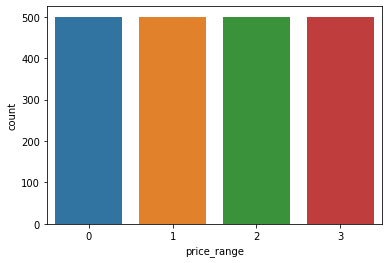

In [18]:
# let's see if this data favor any price range
sns.countplot(x='price_range', data=df_train)
plt.show()

**sienece all pices are the same amount for each category we can check how boolean parameter changes the distribution**

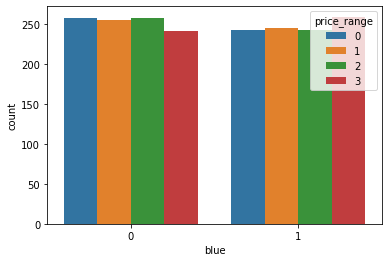

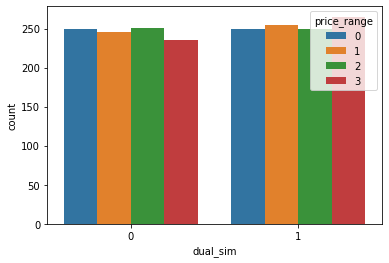

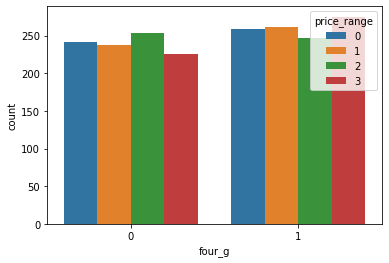

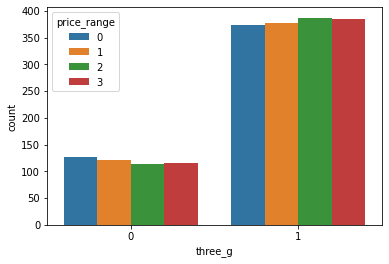

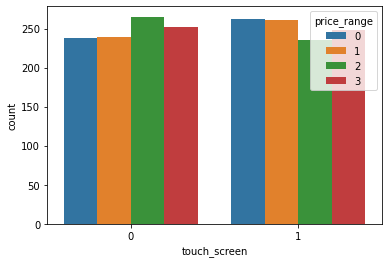

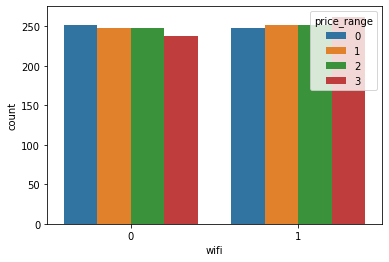

In [19]:
# put the parameters in a list and visualize the difference
bolean_pram_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for param in bolean_pram_list:
    sns.countplot(x=param, data=df_train, hue ='price_range')
    plt.show()

**we didnt see any segnificants result other then there are very few three_g phones with indicates that there are much less need for that in the market hence we have our first impression of the data**

In [20]:
# try to look on the data to check for patterns 
grouped = df_train.groupby('price_range').mean()
print(grouped)

             battery_power   blue  clock_speed  dual_sim     fc  four_g  \
price_range                                                               
0                 1116.902  0.486       1.5502     0.500  4.084   0.518   
1                 1228.868  0.490       1.4886     0.510  4.340   0.524   
2                 1228.320  0.486       1.5298     0.498  4.498   0.494   
3                 1379.984  0.518       1.5204     0.530  4.316   0.550   

             int_memory   m_dep  mobile_wt  n_cores      pc  px_height  \
price_range                                                              
0                31.174  0.4902    140.552    4.600   9.574    536.408   
1                32.116  0.5240    140.510    4.298   9.924    666.892   
2                30.920  0.4908    143.614    4.682  10.018    632.284   
3                33.976  0.5020    136.320    4.502  10.150    744.848   

             px_width       ram    sc_h   sc_w  talk_time  three_g  \
price_range                       

it seams like the parameters 'battery_power', 'px_width', 'ram' have a consistent crelation (in the sense of the mean) to the price, will check those std as well to verify the hypothesies

In [21]:
# validate
grouped = df_train.groupby('price_range').std()
print(grouped)

             battery_power      blue  clock_speed  dual_sim        fc  \
price_range                                                             
0               410.801305  0.500305     0.848941  0.500501  4.183772   
1               438.614528  0.500401     0.814479  0.500401  4.499432   
2               452.863065  0.500305     0.804404  0.500497  4.347390   
3               414.992261  0.500176     0.796450  0.499599  4.332399   

               four_g  int_memory     m_dep  mobile_wt   n_cores        pc  \
price_range                                                                  
0            0.500176   18.101023  0.288184  36.378319  2.268544  6.095805   
1            0.499924   18.000739  0.286895  35.678956  2.311684  6.124806   
2            0.500465   18.441958  0.286215  34.320326  2.262546  5.952861   
3            0.497992   17.930377  0.291901  34.911994  2.297074  6.085521   

              px_height    px_width         ram      sc_h      sc_w  \
price_range          

the std are equally distributed on the relevant parameters 

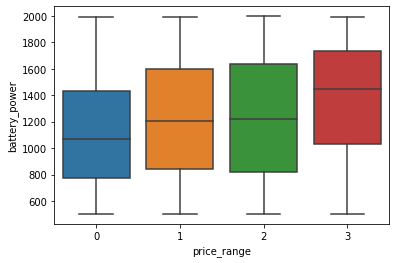

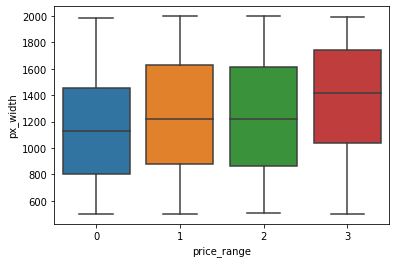

<AxesSubplot:xlabel='price_range', ylabel='ram'>

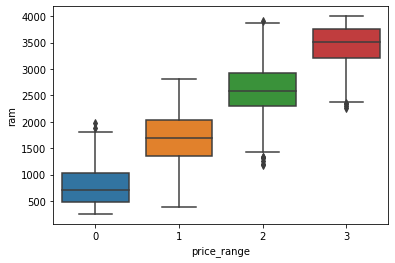

In [22]:
# visuallize the hypotesies
sns.boxplot(x ='price_range', y ='battery_power', data = df_train)
plt.show()
sns.boxplot(x ='price_range', y ='px_width', data = df_train)
plt.show()
sns.boxplot(x ='price_range', y ='ram', data = df_train)

**ram is most sagnificent**

**last EDA before feature engineering**

<AxesSubplot:>

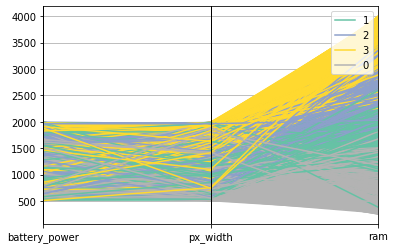

In [23]:
data = df_train[['price_range','battery_power', 'px_width', 'ram']]
pd.plotting.parallel_coordinates(data, 'price_range', colormap=plt.get_cmap("Set2"))

# **feature engineering**

for the moment all our features are numbers and we didnt try to learn yet so no feature enganeering is needed for now

# training models

**suppervized models**

In [24]:
# take to parts
y_train = df_train['price_range'].values
X_train = df_train.drop('price_range', axis=1).values
X_test = df_test.values

preper for work

**first attempt K-NN classifier**

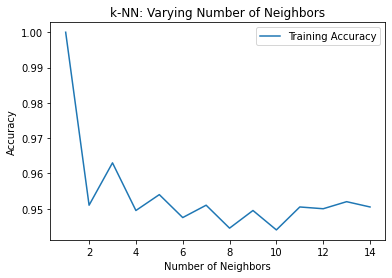

In [25]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
knn_list= list(np.empty(len(neighbors)))
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_list[i] = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn_list[i].fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn_list[i].score(X_train, y_train)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

at first it seams that for 3 niebohrs we will get the best results, but cause of our EDA we recognaize that there can be a lot of similarity with different price ranges.

let us try more metrics to evaluate(in the future affter trying more models because later metric are generalize) 

**gread search for K-NN** 
with cross-val

In [38]:
# Setup a k-NN Classifier
model =  KNeighborsClassifier()

# setup parameters
param = {'n_neighbors':[i for i in range(1,15)]}

# setup grid search
grid = GridSearchCV(model, param, cv=10)

# fit the grid
grid.fit(X_train, y_train)

# show best params
print(grid.best_params_)

{'n_neighbors': 12}


**this make much more sence because we consider CV in the process**

**finally lets try with normalization**

In [27]:
# Setup a k-NN Classifier
model =  KNeighborsClassifier()

# setup parameters
param = {'n_neighbors':[i for i in range(1,15)]}

# setup grid search
grid = GridSearchCV(model, param, cv=10)

# setup normalization pipeline
knn_stand = make_pipeline(StandardScaler(), grid)
knn_norm = make_pipeline(Normalizer(), grid)
    
# Fit the classifier to the training data
knn_stand.fit(X_train, y_train)
knn_norm.fit(X_train, y_train)
    
# transform data
X_train_norm = Normalizer().fit(X_train).transform(X_train)
X_train_stand = StandardScaler().fit(X_train).transform(X_train)

# show scoring
print(knn_stand.score(X_train_norm, y_train))
print(knn_norm.score(X_train_stand, y_train))
knn = KNeighborsClassifier(n_neighbors = 12).fit(X_train, y_train)
print(knn.score(X_train, y_train))

0.25
0.37
0.95


In [28]:
knn_final_with_cv = KNeighborsClassifier(n_neighbors = 12).fit(X_train, y_train)
knn_final_with_out_cv = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

we see that normalizing was not hekpfull this proves that some of the parameters are more important then the others
for example in our hypotesis the ram

**aftter trying logistic regression with no normalization, we know we have to! normalize the data**

In [29]:
# Setup a logistic Classifier
model =  LogisticRegression()

# setup parameters
param = {'C':[0.001, 0.01, 0.1] + [i for i in range(1, 15)],
    'penalty': ['l2', 'none']}

# setup grid search
grid = GridSearchCV(model, param, cv=10, scoring='neg_mean_squared_error')

# fit the grid and print best param
grid.fit(X_train, y_train)

# setup normalization pipeline
logistic_stand = make_pipeline(StandardScaler(), grid)
logistic_norm = make_pipeline(Normalizer(), grid)
    
# Fit the classifier to the training data
logistic_stand.fit(X_train, y_train)
logistic_norm.fit(X_train, y_train)
    
# transform data
X_train_norm = Normalizer().fit(X_train).transform(X_train)
X_train_stand = StandardScaler().fit(X_train).transform(X_train)

# show scoring
print(logistic_stand.score(X_train_norm, y_train))
print(logistic_norm.score(X_train_stand, y_train))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


-3.5
-2.4315


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
final_logistic = LogisticRegression(C=0.001, penalty = 'none').fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


***again normalizing didnt help at all****

In [31]:
def log_reg_gridsearch(lr):
    """
    This function uses the data to gridsearch the parameters and make pipeline for logisticregression models
    
     Args:
        param1 (LogisticRegression): for forther information check the sklearn pakege
    
    Returns:
    None
    
    plot:
    semilogx grapg witch scales the x line by log for unit on the scale
    """
    
    # Instantiate the GridSearchCV object and run the search 
    searcher = GridSearchCV(lr, {'C':[0.01, 0.1, 1, 10, 100]})
    searcher.fit(X_train, y_train)

    # Report the best parameters
    print("Best CV params", searcher.best_params_)

    # Find the number of nonzero coefficients (selected features)
    best_lr = searcher.best_estimator_
    coefs = best_lr.coef_
    print("Total number of features:", coefs.size)
    print("Number of selected features:", np.count_nonzero(coefs))

affter previus succses of normalizing, we have 2 major understandings.
1. there is no difference betwean the nonlinear model to the linear model
2. the normalizer works better here and now we have c = 0.001 as best param

this leeds to the next idea - impllay to K-nn

as we can see standartization didnt help the Knn it even made it worst
what we deed learn is that for Knn there was no difference between stand and norm

In [39]:
#set up model
model = SVC()

# set up parameters
params = {'C':[i for i in range(1,11)],
         'kernel':['linear', 'poly', 'rbf'],
         }

# setup grid search
grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')

# fit the grid and print best param
grid.fit(X_train, y_train)

# show best params
print(grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [ ]:
def svc_train_valid_plot_gama_value_waise(svc):
    """
    This function uses the data to plot and fit a given SVC model
    
     Args:
        param1 (SVC): for forther information check the sklearn pakege
    
    Returns:
    None
    
    plot:
    semilogx grapg witch scales the x line by log for unit on the scale
    """
    # Train and validaton errors initialized as empty list
    train_errs_stand = list()
    train_errs_norm = list()
    train_errs = list()
    gama_values = [0.01, 0.1, 1]
    
    # Loop over values of C_value
    for gama in gama_values:
        
        # Create LogisticRegression object and fit
        svc.gamma = gama
        svc_pipeline_stand = make_pipeline(StandardScaler(), svc)
        svc_pipeline_norm = make_pipeline(Normalizer(), svc)
        svc.fit(X_train, y_train)
        
        svc_pipeline_stand.fit(X_train, y_train)
        svc_pipeline_norm.fit(X_train, y_train)
        
        # Evaluate error rates and append to lists
        train_errs_stand.append( 1.0 - svc_pipeline_stand.score(X_train, y_train) )
        train_errs_norm.append( 1.0 - svc_pipeline_norm.score(X_train, y_train) )
        train_errs.append( 1.0 - svc.score(X_train, y_train) )
        
    # Plot results
    plt.semilogx(gama_values, train_errs_stand)
    plt.semilogx(gama_values, train_errs_norm)
    plt.semilogx(gama_values, train_errs)
    plt.legend(("stand", "norm", "none"))
    plt.show()